In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
import numpy as np

In [4]:
def logk(x_new, a_x, k):
    l_k = 1
    for a in a_x:
        if a != a_x[k]:
            l_k = l_k*(x_new - a)/(a_x[k]-a)
    return l_k

In [5]:
def logrange(x_new, a_x, a_y):
    p = 0
    for k in range(len(a_y)):
        p = p + a_y[k]*logk(x_new, a_x, k)
    return p

In [48]:
def t_k(a_x, a_y, k):
    t = 1
    for x in a_x:
        t = t * a_x[k]-x if x != a_x[k] else t
    return t

In [49]:
def w(x_new, a_x):
    p = 1
    for x in a_x:
        p = p * (x_new - x)
    return p

In [50]:
def s(x_new, a_x, a_y):
    s = 0
    for k in range(len(a_x)):
        s += a_y[k]/ t_k(a_x, a_y, k)/ (x_new - a_x[k])
    return s

In [51]:
def lagr(x_new, a_x , a_y):
    if a_x.count(x_new):
        p = a_y[a_x.index(x_new)]
    else:
        p = w(x_new, a_x) * s(x_new, a_x, a_y)
    return p

Исследование интерполяции функции Рунге $\frac{1}{1+25x^2}$

<IPython.core.display.Javascript object>


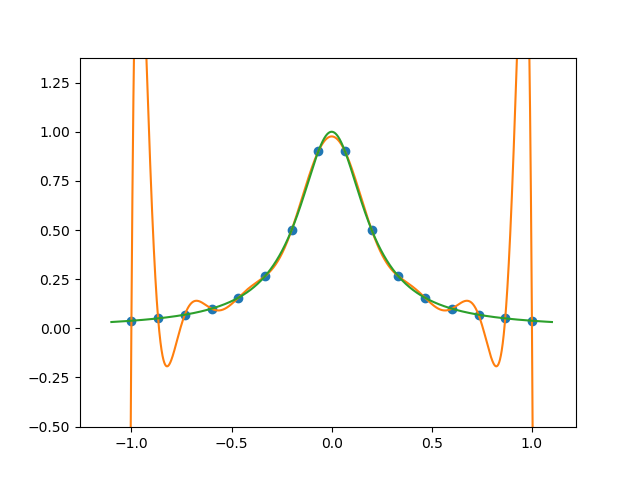

In [74]:
N = 16
a_x = list(np.linspace(-1, 1, N))
a_y = [(1/(1+25*i**2)) for i in a_x]
plt.plot(a_x, a_y, 'o')
x = np.linspace(-1.1, 1.1, 3000)
y = [logrange(x_new, a_x, a_y) for x_new in x]
#y = [lagr(x_new, a_x, a_y) for x_new in x]
plt.plot(x,y)
y_2 = [(1/(1+25*i**2)) for i in x]
plt.plot(x,y_2)

Xt,sd

<IPython.core.display.Javascript object>


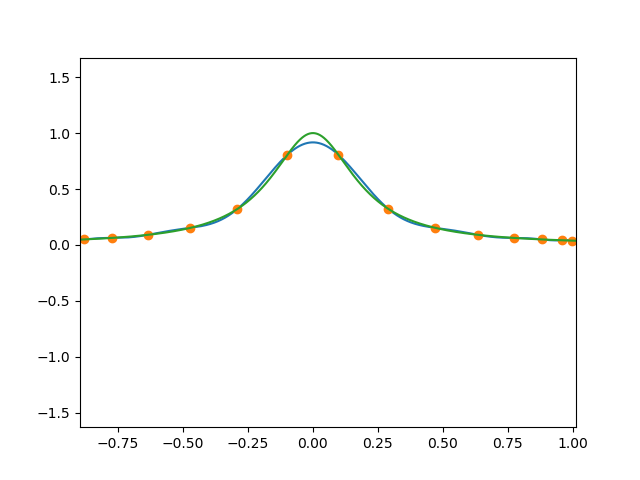

In [73]:
a_x_cheb = [np.cos((2*i+1)/2/N*np.pi) for i in range(N-1)]
a_y_cheb = [(1/(1+25*i**2)) for i in a_x_cheb]
x_cheb = np.linspace(-1.5, 1.5, 3000)
y_cheb = [logrange(x_new, a_x_cheb, a_y_cheb) for x_new in x_cheb]
plt.plot(x_cheb, y_cheb)
plt.plot(a_x_cheb, a_y_cheb, 'o')
plt.plot(x,y_2)